In [254]:
from pathlib import Path
from typing import Union, Generator
from typing import List
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.animation as ani
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly
from datetime import datetime
from datetime import timedelta
from typing import List
from pandas import Series,DataFrame
import matplotlib.animation as animation
from matplotlib.pylab import *
import seaborn
# we have two data from two webs
#gdp
# https://data.worldbank.org/indicator/NY.GDP.MKTP.KN?end=2019&start=1960  
#project2
# this data I select unemployeement rate/GDP/IMPORT/EMPORT
# https://tradingeconomics.com/country-list/gdp 

df = pd.read_excel (r'C:\Users\Administrator\Desktop\project2.xlsx')
print (df)# the first part included

           EMPORT    Last  Previous  Reference    Unit         IMPORT   Last1  \
0       Argentina  140.00    150.00 2020-06-20  points      Argentina  112.00   
1         Armenia   98.40    106.00 2020-08-20  points        Armenia  100.00   
2       Australia  109.00    112.00 2020-06-20  points      Australia  111.00   
3      Azerbaijan  127.00     83.70 2020-12-17  points     Azerbaijan  123.00   
4      Bangladesh  237.00    226.00 2020-12-20  points     Bangladesh  277.00   
..            ...     ...       ...        ...     ...            ...     ...   
62         Turkey   91.52     90.73 2020-08-20  points         Turkey   84.54   
63         Uganda  156.00    151.00 2020-08-20  points         Uganda  130.00   
64        Ukraine   97.00     98.00 2020-07-20  points        Ukraine   97.60   
65  United States  123.00    122.00 2020-09-20  points  United States  124.00   
66        Vietnam  108.00    113.00 2020-12-19  points        Vietnam  107.00   

    Previous1 Reference1   

In [255]:
df=df.dropna(axis=0,how='any')
cols =['EMPORT','Last','Last1','Last2','Last3'] # rename the columns
df1 = df[cols]
df1=df1.rename(columns={'EMPORT':'Country','Last':'Emport','Last1':'Import',
                    'Last2':'Unemployeement_rate','Last3':'GDP'}) # the first part included

In [256]:
df1.head()

,Country,Emport,Import,Unemployeement_rate,GDP
0,Argentina,140.0,112.0,13.1,450.00
1,Armenia,98.4,100.0,17.5,13.67
2,Australia,109.0,111.0,6.9,1393.00
3,Azerbaijan,127.0,123.0,4.8,48.05
4,Bangladesh,237.0,277.0,4.2,303.00


In [257]:
df1=df1.set_index('Country')# the first part included

In [258]:
del df1.index.name# the first part included

In [259]:
df1

,Emport,Import,Unemployeement_rate,GDP
Argentina,140.00,112.00,13.10,450.00
Armenia,98.40,100.00,17.50,13.67
Australia,109.00,111.00,6.90,1393.00
Azerbaijan,127.00,123.00,4.80,48.05
Bangladesh,237.00,277.00,4.20,303.00
...,...,...,...,...
Turkey,91.52,84.54,13.40,754.00
Uganda,156.00,130.00,1.80,34.39
Ukraine,97.00,97.60,9.90,154.00
United States,123.00,124.00,7.90,21428.00


In [260]:
df2 = df1.transpose() # index becomes the table name

In [261]:
df2.head(3)# the first part included

,Argentina,Armenia,Australia,Azerbaijan,Bangladesh,Belgium,Brazil,Bulgaria,Burundi,Canada,...,Switzerland,Taiwan,Tanzania,Thailand,Tunisia,Turkey,Uganda,Ukraine,United States,Vietnam
Emport,140.0,98.4,109.0,127.0,237.0,129.0,117.0,95.7,137.00,110.0,...,96.0,89.05,105.0,101.00,153.0,91.52,156.0,97.0,123.0,108.00
Import,112.0,100.0,111.0,123.0,277.0,126.0,105.0,93.7,96.61,121.0,...,97.5,93.94,102.0,92.65,160.0,84.54,130.0,97.6,124.0,107.00
Unemployeement_rate,13.1,17.5,6.9,4.8,4.2,5.1,7.7,7.5,1.40,9.0,...,22.9,3.83,9.7,1.90,18.0,13.40,1.8,9.9,7.9,2.73


In [262]:
col=['United States','India','Canada','China'] # start right here
df3=df2[col]  # select the 4 countries


In [271]:
df3.head()

,United States,India,Canada,China
Emport,123.0,402.0,110.0,104.0
Import,124.0,569.0,121.0,93.3
Unemployeement_rate,7.9,6.7,9.0,12.9
GDP,21428.0,2875.0,1736.0,282.0


In [269]:
df4 = df3.transpose() # let the column become the index

In [272]:
#po1=df3.loc[['Emport'],:] 
#po2=df3.loc[['Import'],:] 
x=df4['Emport'] # select Emport
y=df4['Import'] # select Import


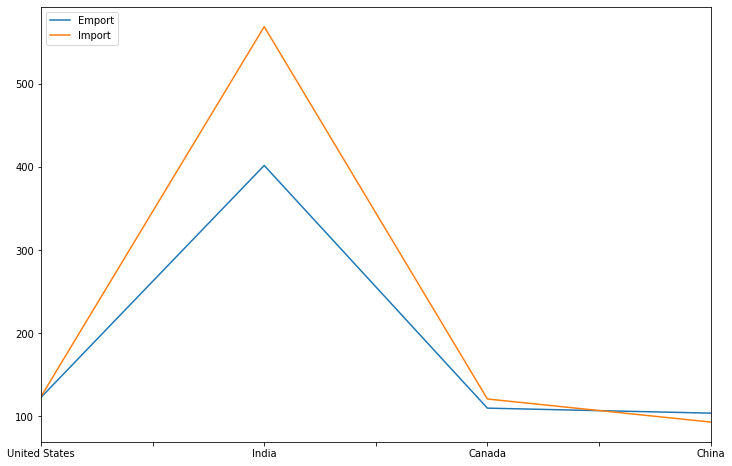

In [273]:
df = pd.DataFrame([x,y]).T #T for transpose
#fig = plt.figure(figsize=(6,2))

plt.rcParams['figure.figsize'] = (12.0, 8.0) # plot the 4 countries 
df.columns=['Emport','Import'] 
df.plot(kind='line')
plt.legend(loc='upper left')
plt.show()

In [274]:
df3

,United States,India,Canada,China
Emport,123.0,402.0,110.0,104.0
Import,124.0,569.0,121.0,93.3
Unemployeement_rate,7.9,6.7,9.0,12.9
GDP,21428.0,2875.0,1736.0,282.0


In [275]:

cell_text=[] # get all value by each column
for i in range(4):
    cell_text.append([])
    cell_text[i].append(df3['United States'][i])
    cell_text[i].append(df3['India'][i])
    cell_text[i].append(df3['Canada'][i])
    cell_text[i].append(df3['China'][i])

In [17]:

rows = ['Emport','Import','Unemployeement_rate','GDP'] # set up for the table plot
cols = ["United States","India","Canada","China"]
shapes = ["◼", "◀", "●","◑"]
colors = ["crimson", "indigo", "limegreen","blue"]

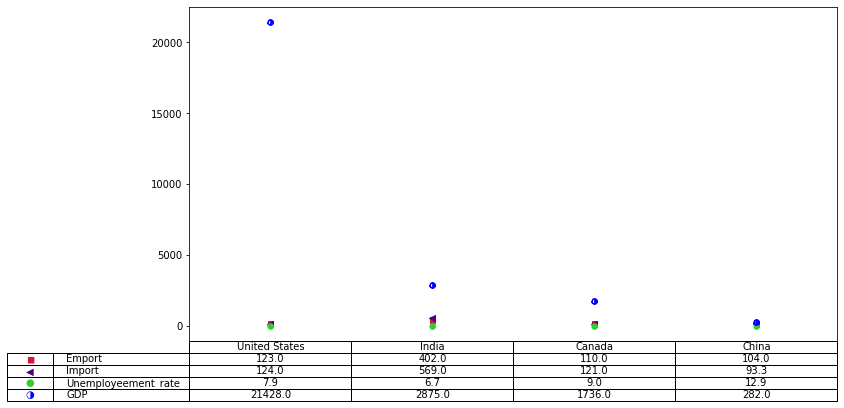

In [18]:
fig, ax = plt.subplots()  #
fig.subplots_adjust(bottom=0.3, left=0.15)
ax.tick_params(labelbottom=False, bottom=False)

for y, s, c in zip(cell_text, shapes, colors):
    ax.scatter(cols, np.array(y).astype(float), c=c, marker=f"${s}$")
ax.set_xlim(-0.5,len(cols)-0.5)

table = ax.table(cellText=cell_text,
                      cellLoc = 'center',
                      rowLabels=rows,
                      rowColours=None,
                      colLabels=cols,
                      loc='bottom')
height = table.get_celld()[1,2].get_height()

for i in range(4):
    cell = table.add_cell(i+1, -2, width=0.07, height=height, text=shapes[i], 
                          loc="center")
    cell.get_text().set_color(colors[i])

plt.show()

In [276]:
w1=df3['United States']

In [20]:
!pip install plotly_express # add the library

In [277]:
df3 = pd.read_csv('gdp.csv') # there is the GDP data by year     # there is the GDP for every year by each country
df3.set_index("Country Name", inplace = True) 
col=["Country Code","Indicator Name","Indicator Code","Region",
    "IncomeGroup","SpecialNotes","TableName" ]  
df3.drop(col, inplace=True, axis=1) # Clean up some data 
df3=df3/100000000 # make it readerble
df3.dropna(axis=0,how='any')# delete the nan value

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Australia,185.776683,196.528167,198.924852,215.074476,237.641393,259.368350,272.684511,303.975809,326.654721,366.289618,...,11461.400000,13966.500000,15461.500000,15761.800000,14674.800000,13516.900000,12088.500000,13301.400000,14339.000000,13926.800000
Austria,65.926938,73.117496,77.561102,83.741753,91.699839,99.940706,108.876823,115.794317,124.406253,135.827986,...,3918.930000,4311.200000,4094.250000,4300.690000,4419.960000,3818.180000,3952.280000,4183.160000,4555.080000,4463.150000
Burundi,1.960000,2.030000,2.135000,2.327500,2.607500,1.589950,1.654446,1.782971,1.832000,1.902057,...,20.321352,22.358209,23.333081,24.516253,27.057833,31.043949,29.596410,31.722924,30.369318,30.123349
Belgium,116.587226,124.001452,132.640157,142.600174,159.601067,173.714576,186.518835,199.920408,213.763531,237.107359,...,4809.520000,5226.460000,4961.810000,5216.430000,5346.780000,4621.500000,4759.010000,5037.890000,5426.860000,5296.070000
Benin,2.261956,2.356682,2.364349,2.539276,2.698190,2.899087,3.029253,3.062220,3.263231,3.307482,...,95.353443,106.933220,111.413589,125.178457,132.845287,113.881610,118.210662,127.016569,142.509860,143.907091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Vincent and the Grenadines,0.130666,0.139999,0.145249,0.137082,0.147582,0.151082,0.160999,0.158352,0.153500,0.166500,...,6.812259,6.761296,6.929333,7.212074,7.277148,7.554000,7.744296,7.921778,8.113000,8.253852
World,13694.300000,14251.100000,15300.600000,16482.900000,18056.600000,19662.600000,21333.300000,22709.400000,24514.300000,27046.300000,...,661131.000000,734483.000000,751460.000000,773020.000000,794508.000000,751988.000000,763358.000000,812292.000000,863571.000000,876975.000000
South Africa,75.753970,79.729968,84.979966,94.233962,103.739959,113.343955,123.549951,137.773945,148.945940,167.803933,...,3753.490000,4164.190000,3963.330000,3668.290000,3509.050000,3176.210000,2963.570000,3495.540000,3682.890000,3514.320000


In [278]:
df3 = df3.transpose() # index becomes the table name
col=['United States'] # select the United States
df4=df3[col]

In [279]:
df4.head()

Country Name,United States
1960,5433.0
1961,5633.0
1962,6051.0
1963,6386.0
1964,6858.0


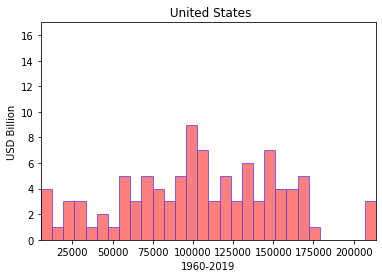

In [284]:
import numpy as np  
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML
%matplotlib inline

rc('animation', html='html5')
data=df4 # Using the United States
num_bins = 30

freq, bin_edges = np.histogram(data, num_bins)
left = np.array(bin_edges[:-1])
right = np.array(bin_edges[1:])
bottom = np.zeros(num_bins)
top = bottom + freq

assert len(left) == num_bins

num_verts = num_bins * (1 + 3 + 1)
verts = np.zeros((num_verts, 2)) #(x, y) coordinates for all the verts
# left wall -- vertex 1 and vertex 2
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top

# right wall -- vertex 3 and vertex 4
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

codes = np.ones(num_verts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY

patch = None  # this will be a patch object later

def animate(i):
    data = np.random.randn(100)
    freq_values, bins = np.histogram(data, num_bins)
    bottom = np.zeros(num_bins)
    top = bottom + freq_values

    verts[1::5, 1] = top
    verts[2::5, 1] = top

    return [patch,] 
fig, ax = plt.subplots();
bar_path = path.Path(verts, codes)

patch = patches.PathPatch(bar_path, facecolor='red', edgecolor='blue', alpha=0.5)

ax.add_patch(patch);
ax.set_xlim(bin_edges[0], bin_edges[-1])
ax.set_ylim(np.min(bottom), top.max() + 5)

plt.xlabel("1960-2019")  #
plt.ylabel("USD Billion") 
plt.title(" United States")

ani = animation.FuncAnimation(fig, animate, 10, blit=True, repeat=True);
ani